<a href="https://colab.research.google.com/github/DevHyunseo/PoscoAcademy_Bigdata/blob/main/%EA%B3%BC%EC%A0%9C_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **타이타닉 데이터 분석 과제**

### 1. 타이타닉 데이터 정의
#### (1) 데이터의 종류
- 범주형 데이터 (Categorical Data): 성별, 티켓 클래스, 탑승 항구 등.
- 연속형 데이터 (Continuous Data): 나이, 운임 등.
- 이산형 데이터 (Discrete Data): 형제자매/배우자 수, 부모/자녀 수 등.
- 이진 데이터 (Binary Data): 생존 여부 등.

#### (2) 데이터의 형태
- CSV 파일 (Comma-Separated Values): 데이터는 CSV 파일로 저장되어 있으며, 각 행은 하나의 속성을 나타냄.

#### (3) 발생 주기 (Frequency of Data Generation)
- 타이타닉 데이터셋은 역사적인 사건을 기반으로 한 데이터.
- 데이터는 타이타닉 침몰 사건을 기준으로 하여 한 번 수집된 후 더 이상 갱신되지 않습니다.

#### (4) 수집 기간 (Data Collection Period)
- 수집 시점 (Point in Time): 데이터는 1912년 4월 15일 타이타닉 호의 침몰 사건 당시의 정보를 기반으로 함.

#### (5) 항목 (Fields) 및 속성 (Attributes)
- PassengerId: 승객 ID (정수형)
- Survived: 생존 여부 (이진형: 0 = 사망, 1 = 생존)
- Pclass: 티켓 클래스 (범주형: 1 = 1등석, 2 = 2등석, 3 = 3등석)
- 수 (이산형)
- Parch: 동반한 부모 또는 자녀 수 (이산형)
- Ticket: 티켓 번호 (문자열)
- Fare: 운임 (연속형)
- Cabin: 선실 번호 (문자열, 결측치 다수 존재)
- Embarked: 탑승한 항구 (범주형: C = Cherbourg, Q = Queenstown, S = Southampton)

#### (6) 데이터 정의 요약
- 데이터 형태: CSV 파일
- 발생 주기: 역사적인 사건에 기반한 데이터
- 수집 기간: 1912년 4월 15일
- 항목 및 속성: 위에 열거한 12개의 항목

### 2. 생존 여부에 대한 가설
- 가설(1) : 남성이 여성, 노약자보다 신체조건이 우수하므로 더 많이 생존했을 것이다.
- 가설(2) : 가족이 많은 경우 가족이 힘을 합쳐 탈출하려고 노력했으므로 더 많이 생존했을 것이다.

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

matplotlib.rc('font', family='NanumGothic')
matplotlib.rc('axes', unicode_minus = False)

df_raw = pd.read_csv("/home/piai/바탕화면/빅데이터주간/01 실습파일/1 Big Data 분석 기초/titanic.csv")
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## step 1 : 데이터 속성 및 기술통계량 확인

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 데이터 속성 확인 결과
1. 총 데이터의 수 : 891개 -> 분석에 충분한 데이터임을 확인함.
2. 열의 수 : 12개
3. Cabin에 다량의 결측값 확인 -> 어떻게 결측치 처리할 것인지?
4. 기타 : Passenger ID, name, Ticket은 생존 확률과는 관계가 없으므로 필요하지 않은 데이터임.

In [ ]:
df_raw.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.758889,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002570,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,30.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### 데이터 기술통계량 확인 결과
- Age: 평균 29.76세, 표준 편차 13.00세, 최소 0.42세, 최대 80세 -> 나이와 생존율의 상관성이 있나?
- SibSp: 평균 0.52명, 표준 편차 1.10명, 최소 0명, 최대 8명 -> 가족의 수와 생존율의 상관성이 있나?
- Parch: 평균 0.38명, 표준 편차 0.81명, 최소 0명, 최대 6명
- Fare: 평균 운임 32.20, 표준 편차 49.69, 최소 0.00, 최대 512.33 -> 티켓 요금으로 Cabin을 추측할 수 있지 않을까?
- Cabin: 많은 결측치로 인해 분석에 신중을 기할 필요가 있음
- Embarked: 최빈값이 S(Southampton)

## step 2 : 목표변수 및 설명변수의 분포 확인

Text(0.5, 1.0, 'Survived')

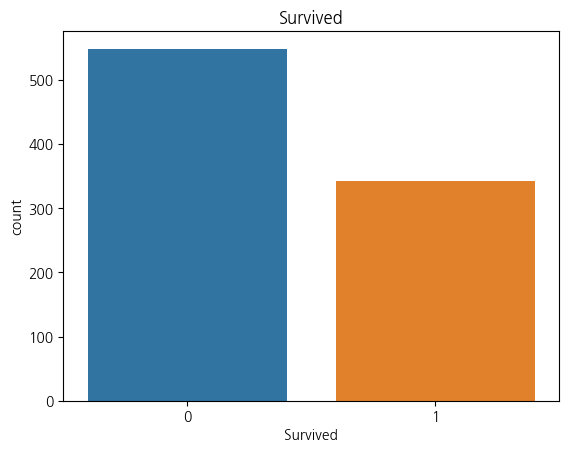

In [ ]:
# Survived : 생존여부 (목표변수)
sns.countplot(data=df_raw, x='Survived')
plt.title('Survived')

### Survived 변수 분석 결과
- 승객의 60%가 사망

Text(0.5, 1.0, 'Pclass')

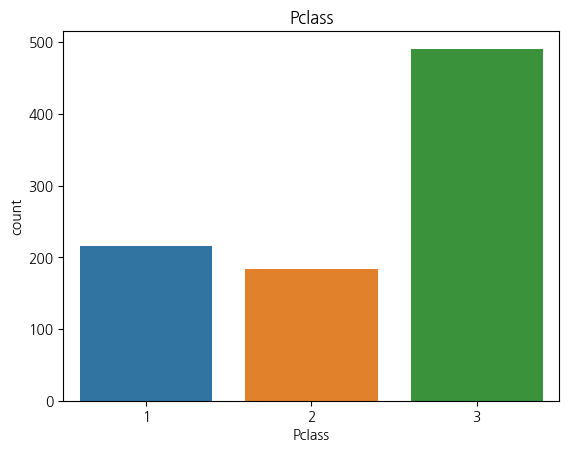

In [ ]:
# Pclass : 티켓 클래스
sns.countplot(data=df_raw, x='Pclass')
plt.title('Pclass')

### Pclass 변수 분석 결과
- 티켓의 클래스는 1등석, 2등석, 3등석으로 구성되며 3등석 승객이 가장 많음.

Text(0.5, 1.0, 'Sex')

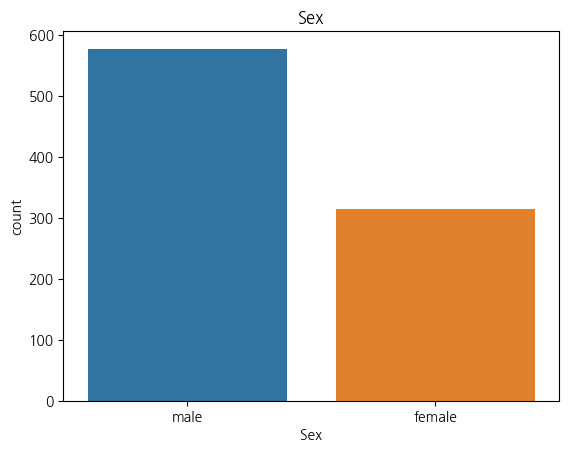

In [ ]:
# Sex : 성별
sns.countplot(data=df_raw, x='Sex')
plt.title('Sex')

### < Sex 변수 분석 결과 >
- 승객은 남성이 여성에 비해 더 많은 비율을 차지함.

Text(0.5, 1.0, 'Embarked')

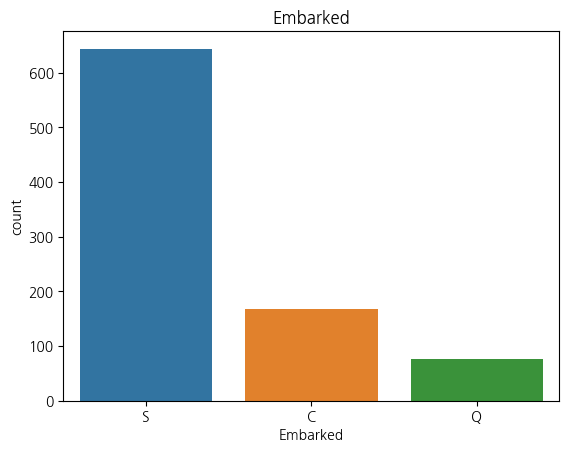

In [ ]:
# Embarked : 승객이 탑승한 곳
sns.countplot(data=df_raw, x='Embarked')
plt.title('Embarked')

### < 분석 결과 >
- S (Southampton)에서 가장 많은 승객이 탑승했음.

Text(0.5, 1.0, 'Age')

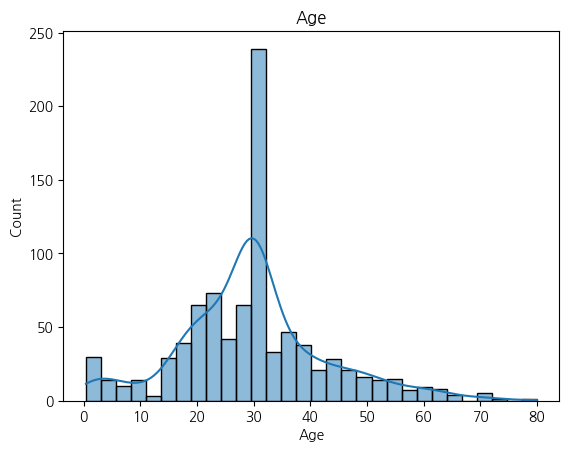

In [ ]:
# Age : 나이
sns.histplot(data=df_raw, x='Age', bins=30, kde=True)
plt.title('Age')

### Age 변수 분석 결과
- 대부분의 승객이 20대에서 40대 사이에 분포하며, 소수의 어린이와 고령 승객이 있음.

Text(0.5, 1.0, 'SibSp')

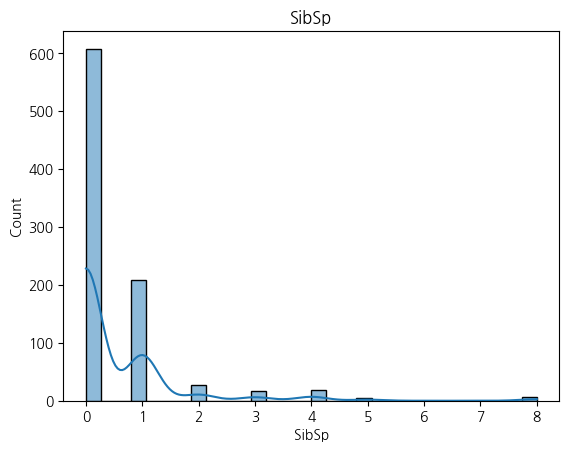

In [ ]:
# SibSp : 함께 탑승한  형제자매 또는 배우자 수
sns.histplot(data=df_raw, x='SibSp', bins=30, kde=True)
plt.title('SibSp')

### SibSp 변수 분석 결과
- 대부분의 승객이 0명이나 1명을 동반

Text(0.5, 1.0, 'Parch')

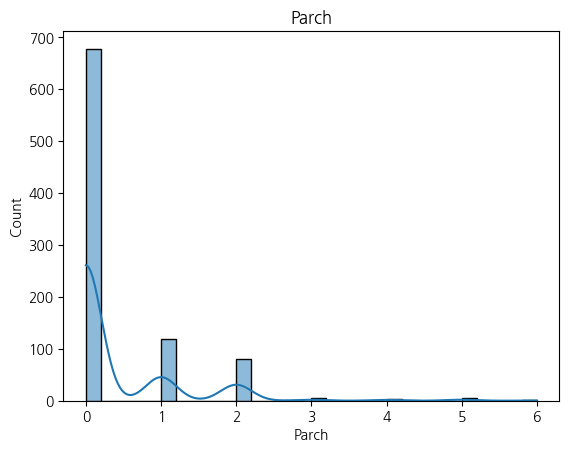

In [ ]:
# Parch : 함께 탑승한 자녀, 부모의 수
sns.histplot(data=df_raw, x='Parch', bins=30, kde=True)
plt.title('Parch')

## Parch 변수 분석 결과
- 대부분의 승객이 부모나 자녀를 동반하지 않음.

Text(0.5, 1.0, 'Fare')

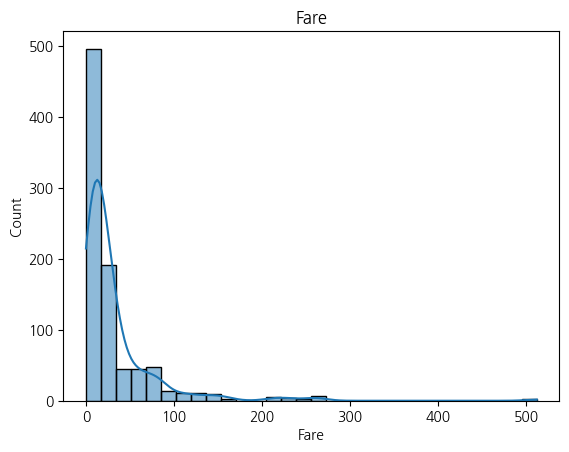

In [ ]:
# Fare : 티켓 요금 (파운드)
sns.histplot(data=df_raw, x='Fare', bins=30, kde=True)
plt.title('Fare')

### Fare 변수 분석 결과
- 대부분의 티켓 가격은 50파운드 이하의 낮은 편이지만, 일부 고가의 티켓도 존재.

## step 3 : 변수들의 결측 및 이상치 처리

In [ ]:
# (1) 결측치
df_raw.isnull().sum() # Cabin 열에 687개의 결측치와 Embarked에 2개의 결측치가 있음.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 결측치 값이 매우 높으므로 결측치를 Unknown 값으로 대체.
df_cleaned = df_raw.copy()
df_cleaned["Cabin"].fillna("Unknown", inplace = True)
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


<Axes: ylabel='Age'>

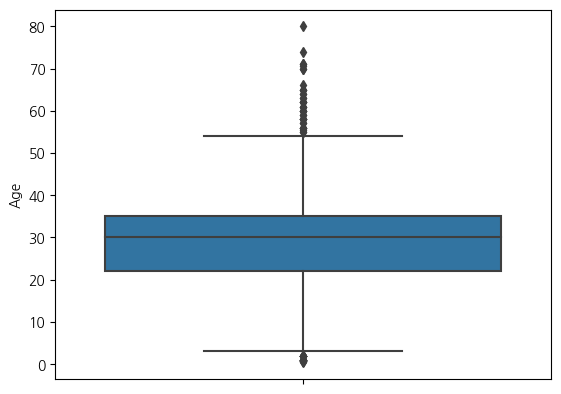

In [ ]:
# (2) 이상치
sns.boxplot(data=df_cleaned, y='Age')
# Age 열에 이상치가 있음을 확인함.

In [ ]:
df_cleaned.sort_values(by = 'Age', ascending=False).head(10)
#80살이 가장 고령자임을 확인함.
#해당 데이터는 1개이고 전체 데이터가 충분히 많으므로 제거하기로 함.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,Unknown,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,Unknown,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Unknown,Q
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,Unknown,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,Unknown,S
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [ ]:
df_droped = df_cleaned[df_cleaned['Age'] != 80] #80살 탑승객 제거
df_droped.reset_index(drop = True, inplace = True) #인덱스 조정
print(df_droped[df_droped['Age'] == 80]) #제거 데이터 확인

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


<Axes: ylabel='SibSp'>

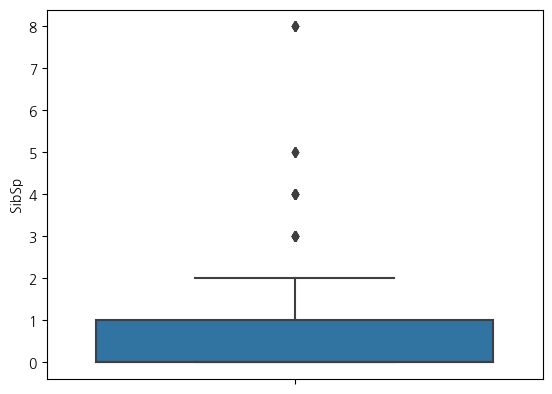

In [ ]:
sns.boxplot(data=df_cleaned, y='SibSp')
# SibSp 열에 이상치가 있음을 확인

In [ ]:
df_droped.sort_values(by = 'SibSp', ascending=False).head(10)
# 형제, 배우자 수가 8명인 가족들은 모두 이상치로 보고 제거하기로 함.
# 7개의 이상치 데이터를 전부 제거해도 충분히 데이터가 많으므로 제거하기로 함.
# 그런데 SibSp이 8인 열이 총 7개 있으므로 해당 가족 Sage를 8명을 모두 검색해봄.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
791,793,0,3,"Sage, Miss. Stella Anna",female,30.0,8,2,CA. 2343,69.55,Unknown,S
324,325,0,3,"Sage, Mr. George John Jr",male,30.0,8,2,CA. 2343,69.55,Unknown,S
862,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,30.0,8,2,CA. 2343,69.55,Unknown,S
159,160,0,3,"Sage, Master. Thomas Henry",male,30.0,8,2,CA. 2343,69.55,Unknown,S
845,847,0,3,"Sage, Mr. Douglas Bullen",male,30.0,8,2,CA. 2343,69.55,Unknown,S
201,202,0,3,"Sage, Mr. Frederick",male,30.0,8,2,CA. 2343,69.55,Unknown,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,30.0,8,2,CA. 2343,69.55,Unknown,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,Unknown,S
682,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,Unknown,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,Unknown,S


In [ ]:
sage_passengers = df_droped[df_droped['Name'].str.contains('Sage', case=False, na=False)]
print(sage_passengers)
#검색 결과 sage 가족은 7명 밖에 나오지 않으므로 7개의 열을 제거하기로 함.

     PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
640          642         1       1               Sagesser, Mlle. Emma  female   
791          793         0       3            Sage, Miss. Stella Anna  female   
845          847         0       3           Sage, Mr. Douglas Bullen    male   
862          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

      Age  SibSp  Parch    Ticket   Fare    Cabin Embarked  
159  30.0      8      2  CA. 2343  69.55  Unknown        S  
180  30.0      8      2  CA. 2343  69.55  Unknown        S  
201  30.0      8      2  CA. 2343  69.55  Unknown        S  
324  30.0      8      2  C

In [ ]:
df_droped = df_droped[df_droped['SibSp'] != 8] #80살 탑승객 제거
df_droped.reset_index(drop = True, inplace = True) #인덱스 조정
print(df_droped[df_droped['SibSp'] == 8]) #제거 데이터 확인

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


<Axes: ylabel='Fare'>

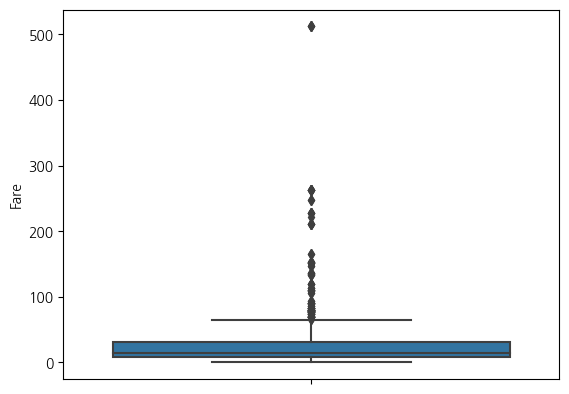

In [ ]:
sns.boxplot(data=df_cleaned, y='Fare')
#Fare에 이상치가 있음을 확인함.

In [ ]:
df_droped.sort_values(by = 'Fare', ascending=False).head()
# Fare가 512파운드 이상인 사람이 3명임을 확인함.
# 해당 데이터를 삭제해도 전체 데이터가 충분하므로 이상치를 제거함.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
674,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
732,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
255,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,Unknown,C
434,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
337,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S


In [ ]:
df_droped = df_droped[df_droped['Fare'] < 500] #500파운드 이상은 제거
df_droped.reset_index(drop = True, inplace = True) #인덱스 조정
print(df_droped[df_droped['Fare'] > 500]) #제거 데이터 확인

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


## step 4 : 그래프 분석을 통해 변수간 관계를 확인


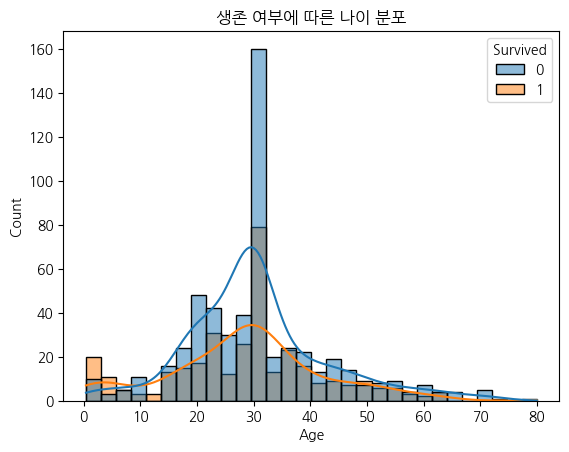

In [ ]:
# 1. 생존 여부에 따른 나이 분포
sns.histplot(data=df_cleaned, x='Age', hue='Survived', bins=30, kde=True)
plt.title('생존 여부에 따른 나이 분포')
plt.show()

## 1. 생존 여부에 따른 나이 분포 분석 결과
- 어린 승객일수록 생존율이 높다. 특히, 어린이의 생존율이 상대적으로 높게 나타난다.
- 어린이의 경우 어른들에 비해 구조의 우선순위가 높았을 것으로 보인다.

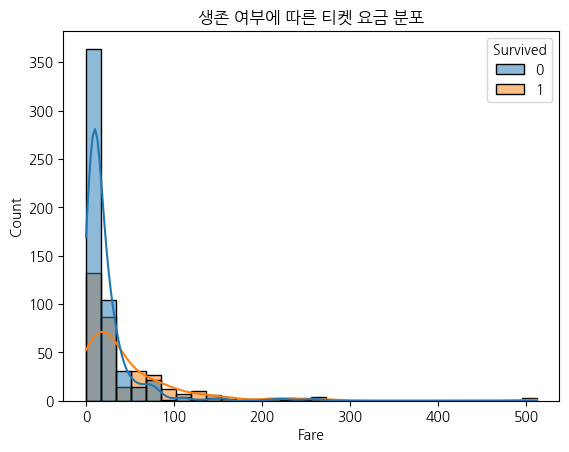

In [ ]:
# 2. 생존 여부에 따른 티켓 요금 분포
sns.histplot(data=df_cleaned, x='Fare', hue='Survived', bins=30, kde=True)
plt.title('생존 여부에 따른 티켓 요금 분포')
plt.show()


## 2. 생존 여부에 따른 티켓 요금 분포 분석 결과
- 티켓 가격이 높은 승객일수록 생존율이 높다.
- 이는 비싼 티켓을 구매한 승객들이 주로 1등석 승객이며, 1등석 승객이 생존할 가능성이 더 높았음을 나타낸다.

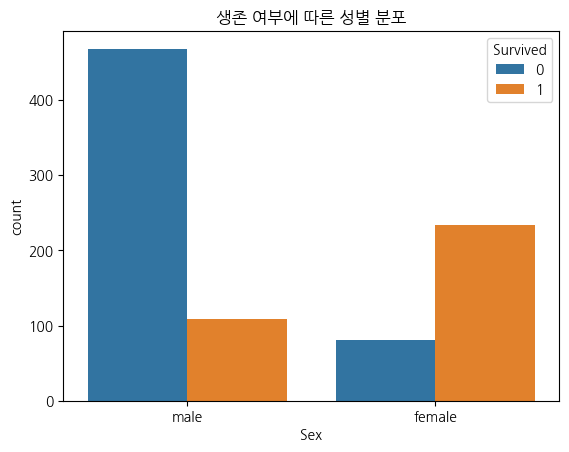

In [ ]:
# 3. 생존 여부에 따른 성별 분포
sns.countplot(data=df_cleaned, x='Sex', hue='Survived')
plt.title('생존 여부에 따른 성별 분포')
plt.show()

## 3. 생존 여부에 따른 성별 분포 분석 결과
- 여성의 생존율이 남성보다 훨씬 높다.
- 실제 "여성과 어린이 우선" 정책에 따라 구조 시 여성 승객이 우선적으로 구조된 결과이다.
- 이로 인해 여성의 생존율이 상대적으로 높아졌다.

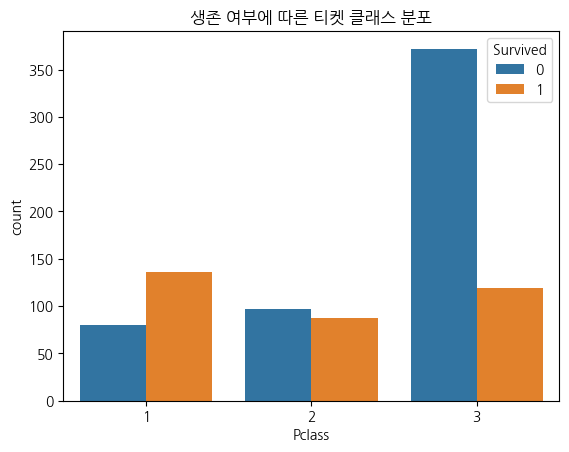

In [ ]:
# 4. 생존 여부에 따른 티켓 클래스 분포
sns.countplot(data=df_cleaned, x='Pclass', hue='Survived')
plt.title('생존 여부에 따른 티켓 클래스 분포')
plt.show()

## 4. 생존 여부에 따른 티켓 클래스 분포 분석 결과
- 1등석 승객의 생존율이 가장 높았고, 3등석 승객의 생존율이 가장 낮았다.
- 이는 1등석의 객실이 구조용 보트와 가까운 위치에 있었거나, 높은 사회적 지위로 인해 우선적으로 구조되었을 가능성을 가진다.

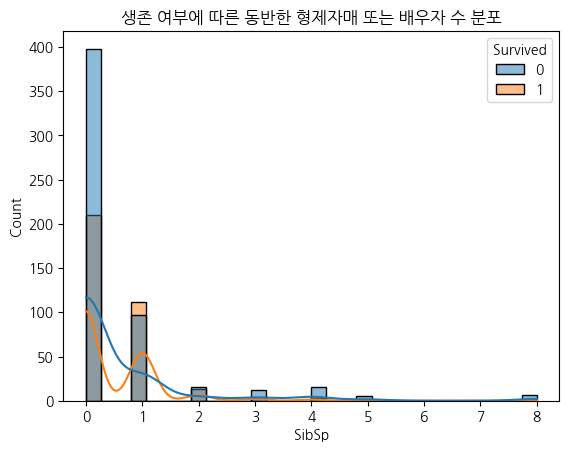

In [ ]:
# 5. 생존 여부에 따른 동반한 형제자매 또는 배우자 수 분포

sns.histplot(data=df_cleaned, x='SibSp', hue='Survived', bins=30, kde=True)
plt.title('생존 여부에 따른 동반한 형제자매 또는 배우자 수 분포')
plt.show()

## 5. 생존 여부에 따른 동반한 형제자매 또는 배우자 수 분포 분석 결과
- 동반한 형제자매 또는 배우자가 1명인 경우 생존율이 높았다.
- 동반자가 적절히 있는 경우 구조 시 상호 지원이 가능하여 생존율이 높아졌을 가능성이 있다.
- 반면, 동반자가 너무 많으면 구조 과정에서 어려움을 겪었을 수 있다.

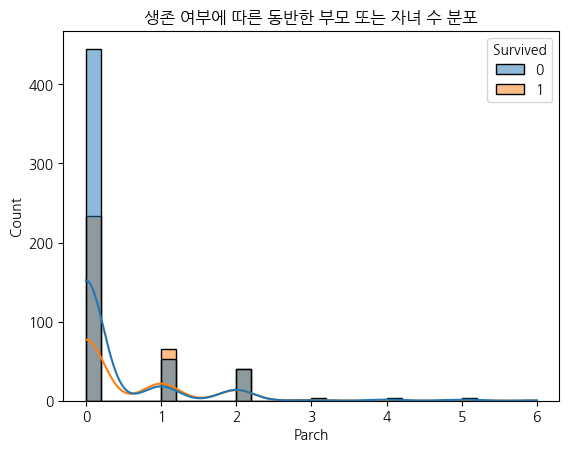

In [ ]:
# 6. 생존 여부에 따른 동반한 부모 또는 자녀 수 분포

sns.histplot(data=df_cleaned, x='Parch', hue='Survived', bins=30, kde=True)
plt.title('생존 여부에 따른 동반한 부모 또는 자녀 수 분포')
plt.show()

# 6. 생존 여부에 따른 동반한 부모 또는 자녀 수 분포 분석 결과
- 동반한 부모 또는 자녀가 없는 경우보다 1~2명인 경우 생존율이 높다.
- 가족이 많은 경우 구조 시 어려움을 겪었을 가능성이 있다.

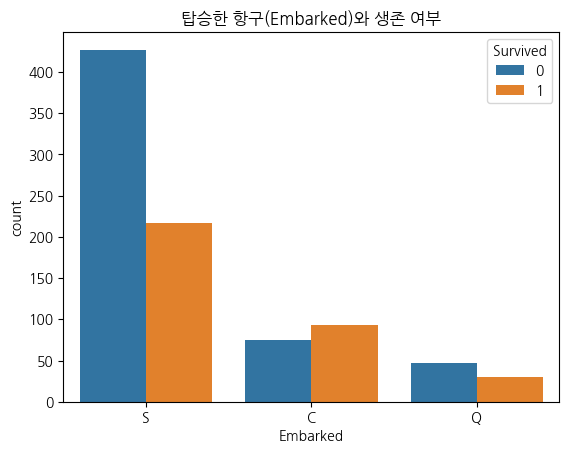

In [ ]:
# 7. 탑승한 항구(Embarked)와 생존 여부

sns.countplot(data=df_cleaned, x='Embarked', hue='Survived')
plt.title('탑승한 항구(Embarked)와 생존 여부')
plt.show()

## 7. 탑승한 항구(Embarked)와 생존 여부에 관한 분석 결과
- Cherbourg(C)에서 탑승한 승객의 생존율이 가장 높았으며,
- Southampton(S)에서 탑승한 승객의 생존율이 가장 낮았다.
- 탑승 항구에 따라 승객의 사회적 지위나 티켓 클래스 분포가 달랐을 가능성이 있다.
- Cherbourg에서 탑승한 승객들은 주로 1등석 승객이었을 가능성이 높아 생존율이 높게 나타났다.


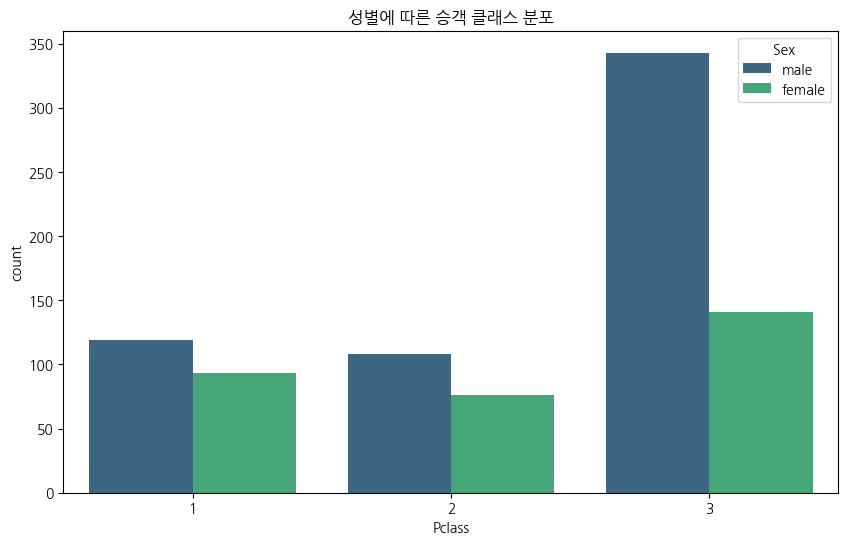

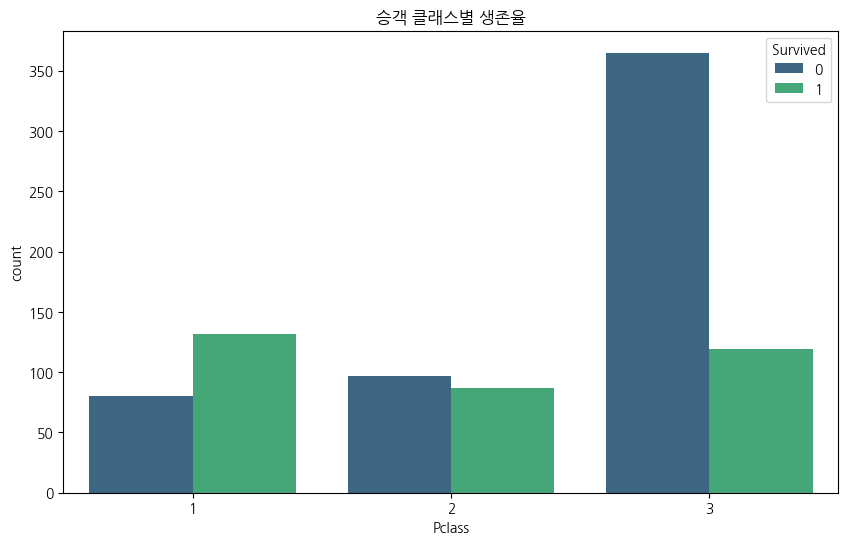

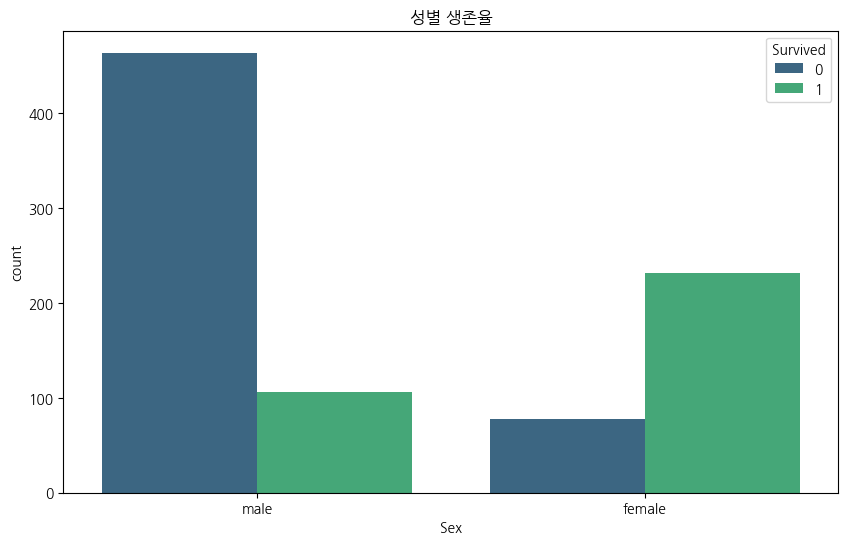

In [ ]:
# 8. 성별과 티켓 클래스에 따른 생존율

plt.figure(figsize=(10, 6))
sns.countplot(data=df_droped, x='Pclass', hue='Sex', palette='viridis')
plt.title('성별에 따른 승객 클래스 분포')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_droped, x='Pclass', hue='Survived', palette='viridis')
plt.title('승객 클래스별 생존율')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_droped, x='Sex', hue='Survived', palette='viridis')
plt.title('성별 생존율')
plt.show()

## 8. 성별과 티켓 클래스에 따른 생존율 분석 결과
- 1등석과 2등석에서는 남성보다 여성 승객의 비율이 상대적으로 높다.
- 이는 구조 시 여성 우선 정책이 1등석과 2등석에서 더 많이 반영되었음을 나타낸다.
- 3등석에서는 남성 승객의 수가 여성보다 훨씬 많다.
- 이는 3등석에 남성 승객이 상대적으로 많이 탑승했음을 나타낸다.

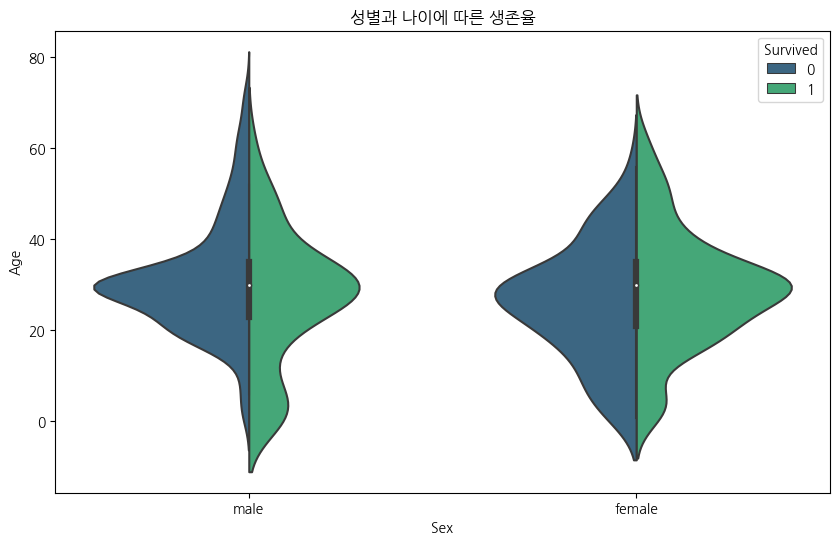

In [ ]:
# 9. 성별과 나이에 따른 생존율
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_droped, x='Sex', y='Age', hue='Survived', split=True, palette='viridis')
plt.title('성별과 나이에 따른 생존율')
plt.show()

## 9. 성별과 나이에 따른 생존율 분석 결과
- 성별과 나이에 따른 생존율을 보았을 때도 마찬가지로 여성의 생존율이 더 높다.

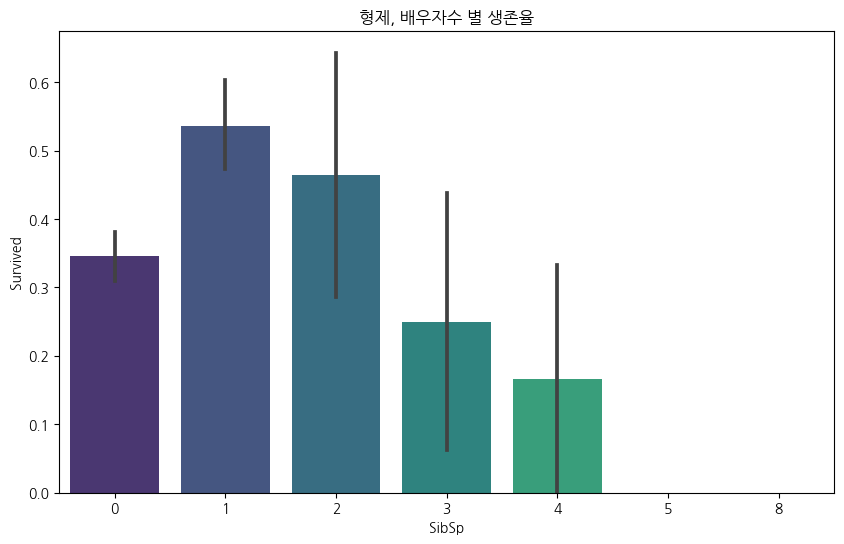

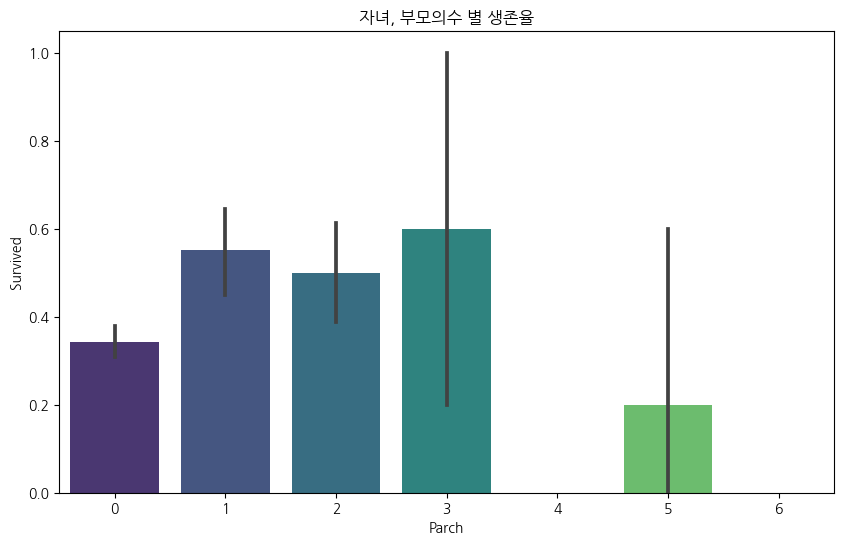

In [ ]:
# 10. 가족 관계에 따른 생존율 (SibSp, Parch)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_cleaned, x='SibSp', y='Survived', palette='viridis')
plt.title('형제, 배우자수 별 생존율')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_cleaned, x='Parch', y='Survived', palette='viridis')
plt.title('자녀, 부모의수 별 생존율')
plt.show()

## 10. 가족 관계에 따른 생존율 분석 결과
- 동반한 형제자매 또는 배우자가 1명인 경우 생존율이 가장 높다.
- 이는 가족과 함께 있는 것이 구조 시 유리했음을 의미한다.
- 동반자가 없거나 많은 경우 생존율이 낮다.
- 이는 동반자가 너무 많을 때 구조 과정에서 어려움을 겪었을 가능성을 나타낸다.

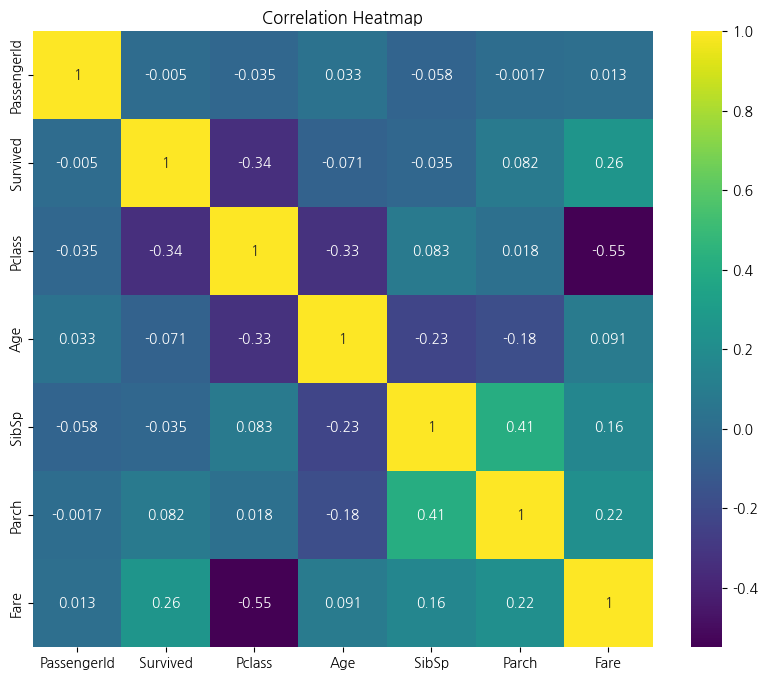

In [ ]:
# 11. 상관관계 히트맵 (숫자형 데이터)
numeric_df = df_cleaned.select_dtypes(include=[np.number])
df_corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


## 11. 분석 결과
- 생존율과 Pclass 상관도가 높기 때문에 좌석등급이 좋을수록 생존율이 높을 수 있다.


## < 생존 여부에 대한 가설>
- 가설(1) : 남성이 여성, 노약자보다 신체조건이 우수하므로 더 많이 생존했을 것이다.
- 가설(2) : 가족이 많은 경우 가족이 힘을 합쳐 탈출하려고 노력했으므로 더 많이 생존했을 것이다.

# 결론

- 타이타닉 사고에서 생존 여부에 영향을 미친 주요 요소는 나이, 성별, 티켓 클래스, 가격, 동반한 가족 수, 탑승한 항구였다.
- 특히, 어린이와 여성, 1등석 승객, 고가의 티켓을 가진 승객들이 생존율이 높았다.
- 이는 당시 구조 우선순위와 사회적 지위가 생존에 큰 영향을 미쳤음을 보여준다.
- 이러한 분석 결과는 향후 유사한 상황에서 구조 정책 수립에 참고할 수 있는 중요한 정보를 제공한다.
- 가설 1번에 대해서는 일반적 상식과 달리 당시 상황에서 구조 우선순위 정책이 있었음을 알 수 있었고
- 이로 인해 남성보다 여성의 생존율이 더 높았음을 알 수 있었다.
- 가설 2번에 대해서는 분석 결과와 상당히 유사한 결과를 보여주었다.